In [1]:
import pandas as pd # Import pandas
import numpy as np  # liner algebra
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import nltk
import nltk as nlp
import string # Import string for list of punctuation
import re
import time
import itertools
from nltk.corpus import stopwords # Import the stop word list
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Reading the data

In [2]:
Truenews = pd.read_csv("C:/Users/bhavani/Desktop/Dataset/True.csv")

In [3]:
Fakenews = pd.read_csv("C:/Users/bhavani/Desktop/Dataset/Fake.csv")

In [4]:
Truenews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
Fakenews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Data Analysis

In [6]:
Truenews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
title      21417 non-null object
text       21417 non-null object
subject    21417 non-null object
date       21417 non-null object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
Fakenews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
title      23481 non-null object
text       23481 non-null object
subject    23481 non-null object
date       23481 non-null object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
#Checking the total NA values for each column and precent
Truenews.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
Fakenews.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
# Describe True data
Truenews.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [11]:
# Describe Fake data
Fakenews.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


# Looking into the real data has location and publisher information which is not in fake
# To make it consistency, removing location and publisher information in real.

In [12]:
Truenews["text"] = Truenews["text"].apply(lambda x: x.partition("-")[2])

In [13]:
Truenews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017"


In [14]:
# Counting by Subjects
Truenews.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [15]:
Fakenews.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [16]:
# Creating a target column named 'category' in both data and concatneating them.
Truenews['category'] = 'True'
Fakenews['category'] = 'Fake'
combined_data = pd.concat([Truenews, Fakenews])

In [17]:
print(combined_data.shape)
combined_data.head()

(44898, 5)


,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",True


# Data Visualization 

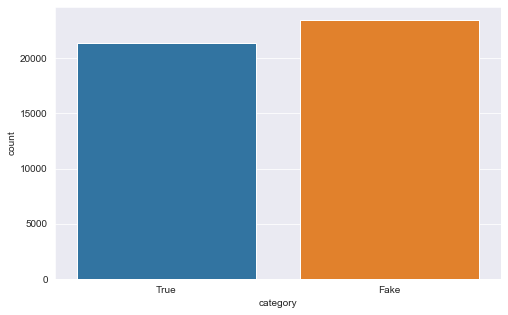

In [18]:
# plots to see whether data is balanced. Using seaborn library to plot 
#counts of true and fake.

plt.figure(figsize = (8,5))
sns.set_style("darkgrid")
sns.countplot(combined_data['category'])

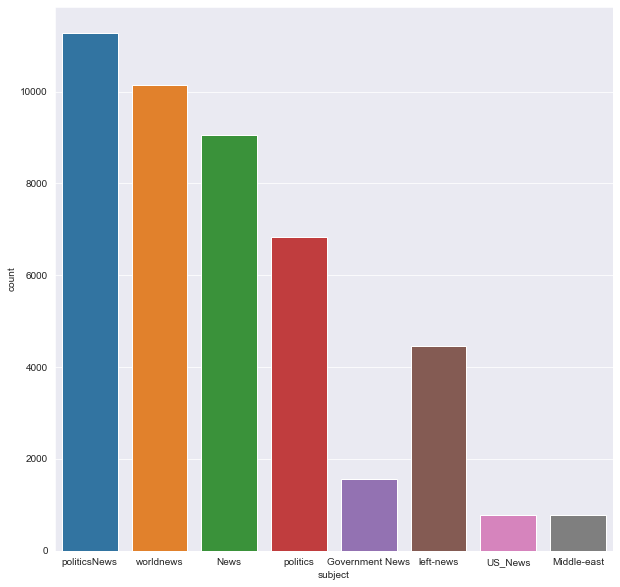

In [19]:
# Now examine the subjects
# The countplot is showing the largerest number of news from politicalNews
combined_data['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(combined_data['subject']);

[Text(0, 0, 'True'), Text(0, 0, 'Fake')]

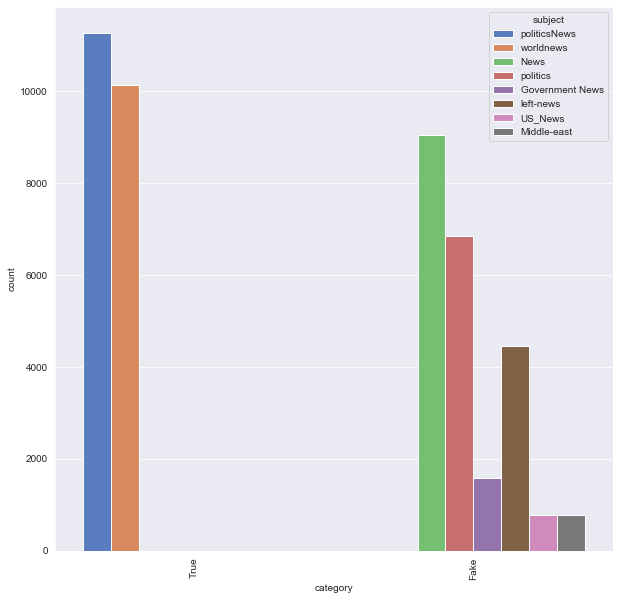

In [20]:
# Lets go in detail
# Looking at plot, it is clearly shows that True news belongs to two subjects
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
chart = sns.countplot(x = "category", hue = "subject" , data = combined_data , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

# Data Cleaning

In [21]:
from string import punctuation
from nltk.tokenize import sent_tokenize, word_tokenize
sw = stopwords.words('english')

new_words=('’','“', '”')

for i in new_words:
    sw.append(i)


# Convert to lower case
combined_data['text'] = combined_data['text'].str.lower()

# Tokenizing
combined_data['tokenized_text'] = combined_data['text'].apply(word_tokenize)

# Remove stopwords
combined_data['filtered_text'] = combined_data['tokenized_text'].apply(lambda x: [item for item in x if item not in sw])

# Remove punction
combined_data['filtered_text'] = combined_data['filtered_text'].apply(lambda x: [item for item in x if item not in punctuation])

# Check results
print(len(combined_data['text'].iloc[0]),
      len(combined_data['tokenized_text'].iloc[0]),
      len(combined_data['filtered_text'].iloc[0]))

4637 878 453


In [22]:
combined_data.head()

,title,text,subject,date,category,tokenized_text,filtered_text
0,"As U.S. budget fight looms, Republicans flip t...",the head of a conservative republican faction...,politicsNews,"December 31, 2017",True,"[the, head, of, a, conservative, republican, f...","[head, conservative, republican, faction, u.s...."
1,U.S. military to accept transgender recruits o...,transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",True,"[transgender, people, will, be, allowed, for, ...","[transgender, people, allowed, first, time, en..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,the special counsel investigation of links be...,politicsNews,"December 31, 2017",True,"[the, special, counsel, investigation, of, lin...","[special, counsel, investigation, links, russi..."
3,FBI Russia probe helped by Australian diplomat...,trump campaign adviser george papadopoulos to...,politicsNews,"December 30, 2017",True,"[trump, campaign, adviser, george, papadopoulo...","[trump, campaign, adviser, george, papadopoulo..."
4,Trump wants Postal Service to charge 'much mor...,president donald trump called on the u.s. pos...,politicsNews,"December 29, 2017",True,"[president, donald, trump, called, on, the, u....","[president, donald, trump, called, u.s., posta..."


In [23]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

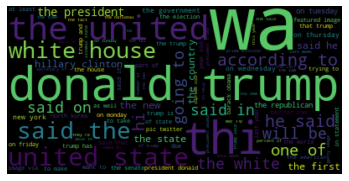

In [24]:
text = " ".join(text for text in combined_data.text)

wordcloud = WordCloud(background_color="black", max_words=1000,
                      max_font_size=90, random_state=42).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [27]:
from wordcloud import WordCloud,STOPWORDS

In [28]:
# WordCloud for Truenews (Category - True)

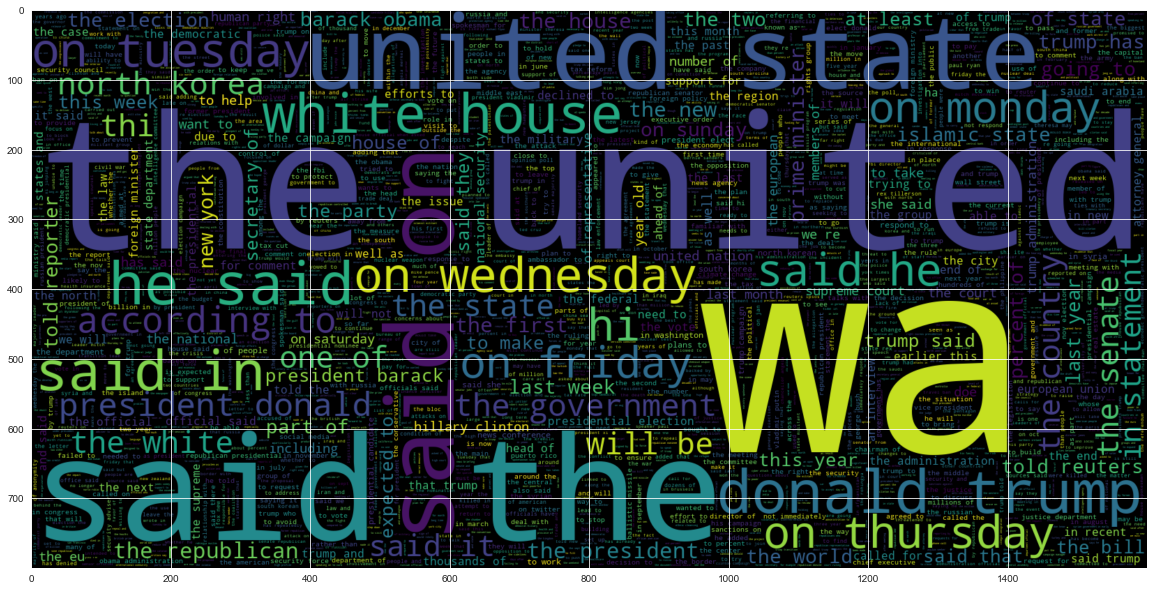

In [29]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(combined_data[combined_data.category == 'True'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [34]:
# WordCloud for Fakenews (Category - Fake)

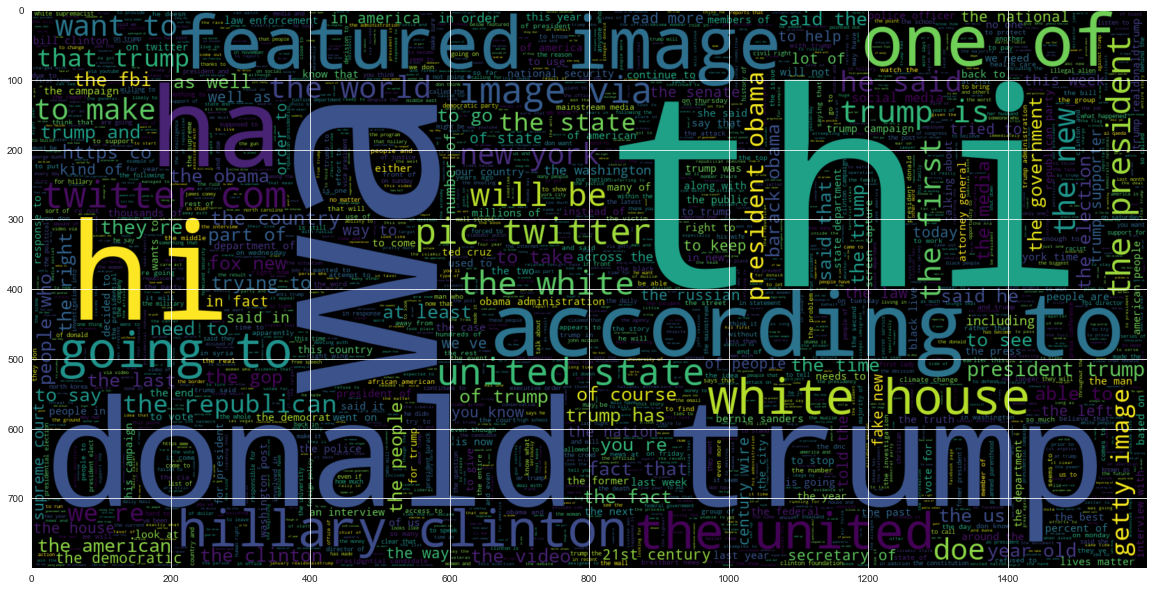

In [35]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(combined_data[combined_data.category == 'Fake'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [36]:
# Number of Characters in texts

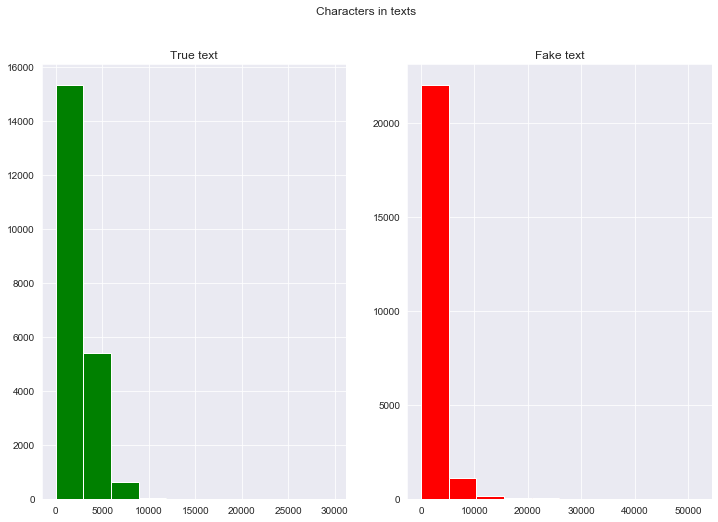

In [37]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=combined_data[combined_data['category']=='True']['text'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('True text')
text_len=combined_data[combined_data['category']=='Fake']['text'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

In [38]:
# Creating two separate datasets for fake and True news to examine the most common words
combined_data_Fake = combined_data[combined_data.category == 'Fake']
combined_data_True = combined_data[combined_data.category == 'True']
combined_data_Fake.head()

,title,text,subject,date,category,tokenized_text,filtered_text
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",Fake,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",Fake,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"on friday, it was revealed that former milwauk...",News,"December 30, 2017",Fake,"[on, friday, ,, it, was, revealed, that, forme...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"on christmas day, donald trump announced that ...",News,"December 29, 2017",Fake,"[on, christmas, day, ,, donald, trump, announc...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",Fake,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ..."


In [39]:
Fakenews = combined_data_Fake.filtered_text.tolist()

Fake_list = []
for sublist in Fakenews:
    for item in sublist:
        Fake_list.append(item)

Truenews = combined_data_True.filtered_text.tolist()

True_list = []
for sublist in Truenews:
    for item in sublist:
        True_list.append(item)
        
all_words = combined_data.filtered_text.tolist()

all_words_list = []
for sublist in all_words:
    for item in sublist:
        all_words_list.append(item)

In [40]:
vocab_Fake = nltk.FreqDist(Fake_list)
vocab_True = nltk.FreqDist(True_list)
vocab_all = nltk.FreqDist(all_words_list)

In [41]:
print('Fake most common words: ',vocab_Fake.most_common(20))

Fake most common words:  [('trump', 74233), ('said', 31145), ('people', 26011), ('president', 25739), ('would', 23461), ('one', 22992), ('clinton', 18079), ('obama', 17919), ('like', 17660), ('donald', 17234), ('also', 15242), ('new', 14198), ('news', 14195), ('us', 13917), ('even', 13690), ('hillary', 13673), ('white', 12797), ('time', 12790), ('state', 12543), ('via', 11353)]


In [42]:
print('True most common words: ',vocab_True.most_common(20))

True most common words:  [('said', 99018), ('trump', 54129), ('u.s.', 38341), ('would', 31520), ('president', 26293), ('state', 19726), ('government', 18285), ('states', 16512), ('house', 16509), ('also', 15944), ('new', 15881), ('united', 15376), ('republican', 15336), ('people', 15128), ('told', 14244), ('could', 13705), ('one', 12641), ('last', 12599), ('party', 12433), ('two', 11612)]


In [43]:
print('All most common words: ',vocab_all.most_common(20))

All most common words:  [('said', 130163), ('trump', 128362), ('would', 54981), ('president', 52032), ('u.s.', 46494), ('people', 41139), ('one', 35633), ('state', 32269), ('also', 31186), ('new', 30079), ('donald', 27573), ('clinton', 27531), ('house', 27113), ('obama', 27112), ('government', 26886), ('states', 26040), ('republican', 24343), ('could', 23935), ('united', 23354), ('told', 23347)]


In [64]:
# Dispersion Plot

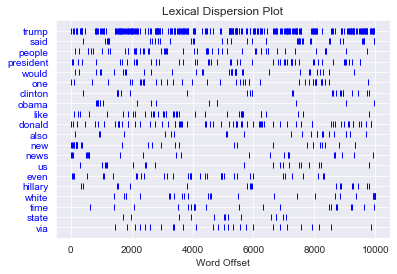

In [66]:
# The first 10000 character from Fake
common_words_Fake = [item[0] for item in vocab_Fake.most_common(20)]
nltk.Text(Fake_list[:10000]).dispersion_plot(common_words_Fake)

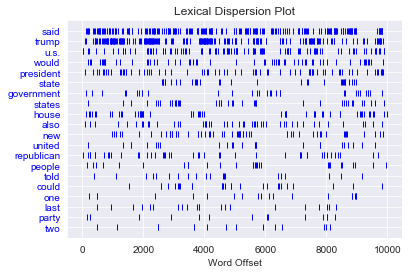

In [67]:
# The first 10000 character for True
common_words_True = [item[0] for item in vocab_True.most_common(20)]
nltk.Text(True_list[:10000]).dispersion_plot(common_words_True)

In [68]:
#Building Models

In [69]:
# Split the data into Testing and Training

In [70]:
# Using TfidfVectorizer

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=sw,lowercase=True)
X = vectorizer.fit_transform(combined_data.text)
Y = combined_data.category

In [72]:
print (X.shape)
print (Y.shape)

(44898, 121738)
(44898,)


In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [74]:
# Multinomial Naive Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()
model_NB.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [76]:
prediction = model_NB.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 93.59%


In [77]:
from sklearn.metrics import classification_report
# Print a classification report
print(f"Classification Report: \n {classification_report(y_test,prediction)}")

print(f"\n Confusion matrix: \n {confusion_matrix(y_test,prediction)}")

#overa all accuracy 
print(f"\n Over all Accuracy of the Model: \n {accuracy_score(y_test,prediction)}")

Classification Report: 
               precision    recall  f1-score   support

        Fake       0.94      0.94      0.94      7094
        True       0.94      0.93      0.93      6376

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470


 Confusion matrix: 
 [[6684  410]
 [ 454 5922]]

 Over all Accuracy of the Model: 
 0.9358574610244988


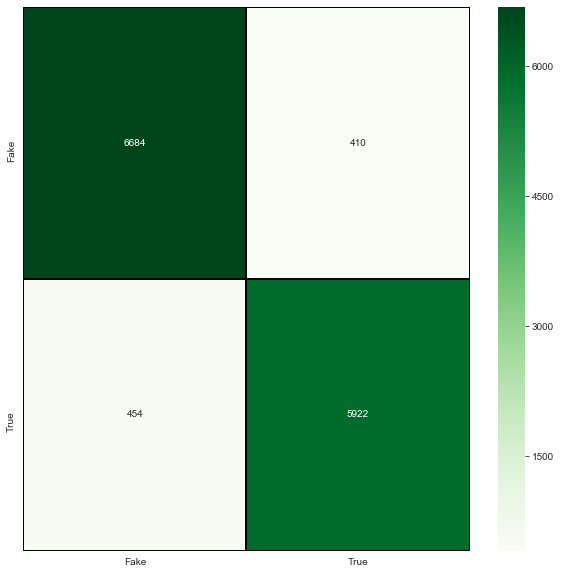

In [78]:
cm = confusion_matrix(y_test,prediction)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Greens", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'])

In [79]:
# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

C:\Users\bhavani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
prediction = model_LR.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.08%


In [82]:
# Print a classification report
print(f"Classification Report: \n {classification_report(y_test,prediction)}")

print(f"\n Confusion matrix: \n {confusion_matrix(y_test,prediction)}")

#overa all accuracy 
print(f"\n Over all Accuracy of the Model: \n {accuracy_score(y_test,prediction)}")

Classification Report: 
               precision    recall  f1-score   support

        Fake       0.98      0.98      0.98      7094
        True       0.98      0.98      0.98      6376

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470


 Confusion matrix: 
 [[6954  140]
 [ 118 6258]]

 Over all Accuracy of the Model: 
 0.9808463251670378


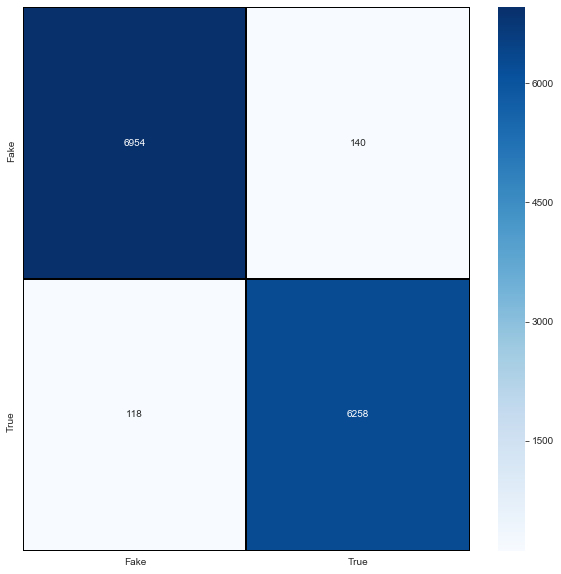

In [83]:
cm = confusion_matrix(y_test,prediction)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'])

In [84]:
# Support Vector Machine

In [85]:
from sklearn.svm import SVC
model_SVM = LinearSVC()
model_SVM.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [86]:
prediction = model_SVM.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.86%


In [87]:
# Print a classification report
print(f"Classification Report: \n {classification_report(y_test,prediction)}")

print(f"\n Confusion matrix: \n {confusion_matrix(y_test,prediction)}")

#overa all accuracy 
print(f"\n Over all Accuracy of the Model: \n {accuracy_score(y_test,prediction)}")

Classification Report: 
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      7094
        True       0.99      0.99      0.99      6376

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470


 Confusion matrix: 
 [[7020   74]
 [  80 6296]]

 Over all Accuracy of the Model: 
 0.9885671863400148


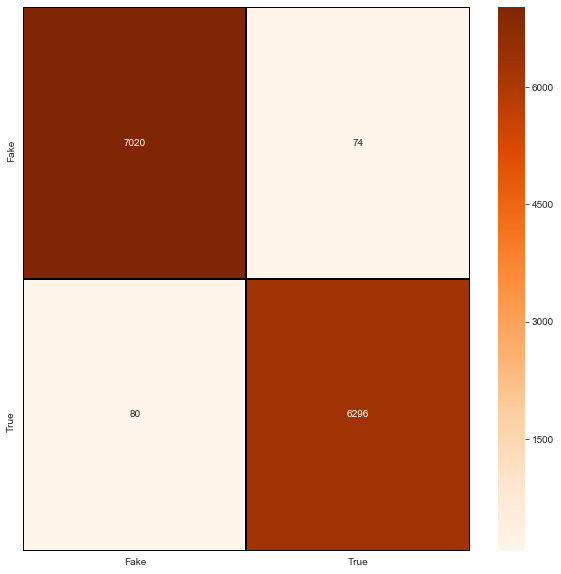

In [88]:
cm = confusion_matrix(y_test,prediction)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Oranges", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'])